In [0]:
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Объединение файлов в единый файл 

In [0]:
df = pd.DataFrame()

for file in listdir("data"):
    df = pd.concat([df, pd.read_csv('data/' +  file)], ignore_index=True)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


# Подготовка и чистка данных

В данном блоке исследуем данные, чистим их.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


Так-как кол-во данных во всех колонках одинаковое - ни в какой строке нет NaN данных. (Но могут быть строки полностью NaN)

In [0]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


  - Order ID :
    - unique != count -> несколько строк описывают один заказ
    - top = 'Order ID' - это какая-то аномалия, надо проверить, почему самое повторяющееся значение в колонке = заголовок этой колонки и оно повторяется аж 355 раз.
- Product :
    -  unique = 20 -> Данные всего по 20 товарам.
    -  top = 1 -> В большиснтве заказов (~90%) присутствует 1 уникальный продукт
- Price Each - числовая характеристика
- Order Date
    -  top = 'Order Date' - это какая-то аномалия, надо проверить, почему самое повторяющееся значение в колонке = заголовок этой колонки и оно повторяется аж 355 раз.
- Purchase Address :
    - top = 'Purchase Address' - это какая-то аномалия, надо проверить, почему самое повторяющееся значение в колонке = заголовок этой колонки и оно повторяется аж 355 раз.

In [0]:
df[df['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
158,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
990,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1684,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3126,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184502,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184542,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185359,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Странная аномалия, дропним такие строки из нашей выборки

In [0]:
df = df[df['Order ID'] != 'Order ID']
len(df)

186495

In [0]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,168552,21903,8,9


  - Order ID :
    - unique != count -> несколько строк описывают один заказ
    - top = 5 -> Максимальное кол-во уникального наименования товара в заказе = 5
- Product :
    -  unique = 19 -> Данные всего по 19 товарам.
    -  top = USB-C Charging
- Quantity Ordered
    -  top = 1 -> В большиснтве заказов (~90%) присутствует 1 уникальный продукт
- Price Each - числовая характеристика. 
    - Многовероятно, что top = 11.95 - цена топового товара USB-C Charging, т.к. freq одинаковое в обеих колонках
- Order Date
    -  числовая хакаректистика
- Purchase Address :
    - числовая характеристика

Убираем строки с NaN c помощью isnull()

In [0]:
#Проверяю, как работает isnull()
df.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [0]:
#По столбцам
df.isnull().any() 

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

В каждом столбце есть нулевые знаечния

In [0]:
#По строкам
df.isnull().any(axis = 1)

0         False
1         False
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186495, dtype: bool

In [0]:
#убрали все тсроки, где везде null
df = df[~df.isnull().all(axis = 1)]

In [0]:
df[df.isnull().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Строк, в которых есть Nan больше нет.


Провоерим, сходится ли длина df с ненулевыми значениями из describe

In [0]:
len(df)

185950

Виват

# Исследуем данных

## What was the best month for sales?
    - december - the best
    - january - the worst 

In [0]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


In [0]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [0]:
df['Order Month'] = df['Order Date'].dt.month

In [0]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Price total'] = df["Quantity Ordered"] * df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Price total
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99
...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,2019-10-12 04:32:00,"920 Adams St, San Francisco, CA 94016",10,3.84
186846,278793,Wired Headphones,1,11.99,2019-10-28 22:00:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99
186847,278794,AA Batteries (4-pack),1,3.84,2019-10-09 20:58:00,"346 Spruce St, San Francisco, CA 94016",10,3.84
186848,278795,iPhone,1,700.00,2019-10-31 17:21:00,"291 Hill St, Seattle, WA 98101",10,700.00


In [0]:
df.groupby('Order Month').sum()['Price total'].round()

Order Month
1     1822257.0
2     2202022.0
3     2807100.0
4     3390670.0
5     3152607.0
6     2577802.0
7     2647776.0
8     2244468.0
9     2097560.0
10    3736727.0
11    3199603.0
12    4613443.0
Name: Price total, dtype: float64

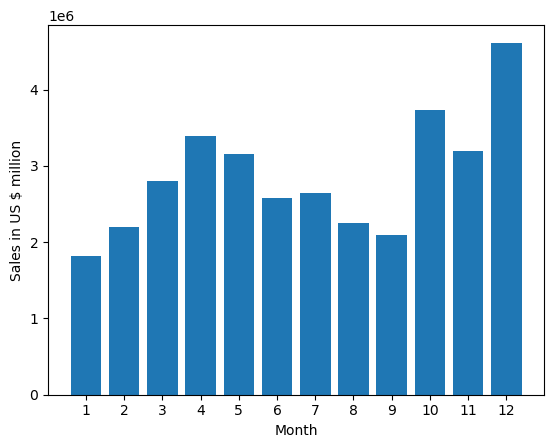

In [0]:
months = range(1, 13)
plt.bar(months, df.groupby('Order Month').sum()['Price total'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in US $ million')
plt.show()

##  What city sold the most product? 
    - San Francisco - AAA Batteries (4-pack)    7408 items

In [0]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Price total
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99
...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,2019-10-12 04:32:00,"920 Adams St, San Francisco, CA 94016",10,3.84
186846,278793,Wired Headphones,1,11.99,2019-10-28 22:00:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99
186847,278794,AA Batteries (4-pack),1,3.84,2019-10-09 20:58:00,"346 Spruce St, San Francisco, CA 94016",10,3.84
186848,278795,iPhone,1,700.00,2019-10-31 17:21:00,"291 Hill St, Seattle, WA 98101",10,700.00


In [0]:
def get_city(x):
    return x.split(',')[1].strip()

def get_state(x):
    return x.split(',')[2].split()[0].strip()

df['City'] = df['Purchase Address'].apply(lambda x : f"{get_city(x)} {get_state(x)}")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Price total,City
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95,Portland ME
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco CA
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles CA
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99,Seattle WA
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco CA
...,...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,2019-10-12 04:32:00,"920 Adams St, San Francisco, CA 94016",10,3.84,San Francisco CA
186846,278793,Wired Headphones,1,11.99,2019-10-28 22:00:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99,Los Angeles CA
186847,278794,AA Batteries (4-pack),1,3.84,2019-10-09 20:58:00,"346 Spruce St, San Francisco, CA 94016",10,3.84,San Francisco CA
186848,278795,iPhone,1,700.00,2019-10-31 17:21:00,"291 Hill St, Seattle, WA 98101",10,700.00,Seattle WA


In [0]:
result = df.groupby('City').sum()['Quantity Ordered']
result

City
Atlanta GA          16602
Austin TX           11153
Boston MA           22528
Dallas TX           16730
Los Angeles CA      33289
New York City NY    27932
Portland ME          2750
Portland OR         11303
San Francisco CA    50239
Seattle WA          16553
Name: Quantity Ordered, dtype: int64

In [0]:
df[df['City'] == 'San Francisco CA'].groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False)[:1]

Product
AAA Batteries (4-pack)    7408
Name: Quantity Ordered, dtype: int64

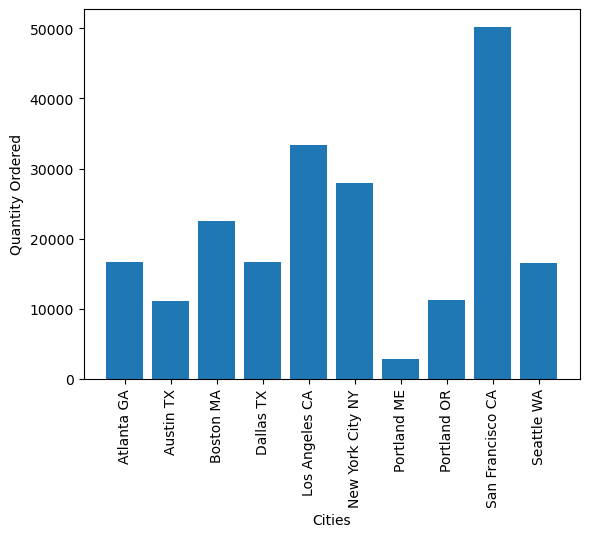

In [0]:
cities = result.index

plt.bar(cities, result)
plt.xticks(cities, rotation = 'vertical')
plt.xlabel('Cities')
plt.ylabel('Quantity Ordered')
plt.show()

##  What time should we display advertisements to maximize the likelihood of purchases?

- Most purchases are made at 11-12 am and 19 PM.

- Least purchases are made at night and at lunchtime.


So, depending on the goals, there can be two strategies:
1. increase the purchase amount at lunchtime - > more ads from 14 to 17
2. increase the purchase amount during "Prime time shopping" - > at 11-12 am and 19 PM

In [0]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Price total,City
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95,Portland ME
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco CA
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles CA
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99,Seattle WA
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco CA
...,...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,2019-10-12 04:32:00,"920 Adams St, San Francisco, CA 94016",10,3.84,San Francisco CA
186846,278793,Wired Headphones,1,11.99,2019-10-28 22:00:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99,Los Angeles CA
186847,278794,AA Batteries (4-pack),1,3.84,2019-10-09 20:58:00,"346 Spruce St, San Francisco, CA 94016",10,3.84,San Francisco CA
186848,278795,iPhone,1,700.00,2019-10-31 17:21:00,"291 Hill St, Seattle, WA 98101",10,700.00,Seattle WA


In [0]:
result = df.groupby(df['Order Date'].dt.hour).count()['Order ID']
result

Order Date
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

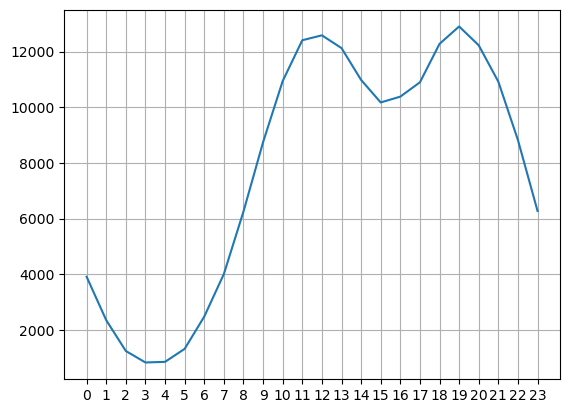

In [0]:
hours = range(0, 24)

plt.plot(hours, result)
plt.xticks(hours)
plt.grid()
plt.show()

## What products are most often sold together? 


1. ('iPhone', 'Lightning Charging Cable') 1005
2. ('Google Phone', 'USB-C Charging Cable') 987

In [0]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Price total,City
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95,Portland ME
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco CA
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles CA
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99,Seattle WA
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco CA
...,...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,2019-10-12 04:32:00,"920 Adams St, San Francisco, CA 94016",10,3.84,San Francisco CA
186846,278793,Wired Headphones,1,11.99,2019-10-28 22:00:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99,Los Angeles CA
186847,278794,AA Batteries (4-pack),1,3.84,2019-10-09 20:58:00,"346 Spruce St, San Francisco, CA 94016",10,3.84,San Francisco CA
186848,278795,iPhone,1,700.00,2019-10-31 17:21:00,"291 Hill St, Seattle, WA 98101",10,700.00,Seattle WA


In [0]:
df.Product.unique()

array(['USB-C Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', '27in FHD Monitor', 'Bose SoundSport Headphones', 'Apple Airpods Headphones', 'Lightning Charging Cable', 'Wired Headphones', 'Flatscreen TV', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', '34in Ultrawide Monitor', 'iPhone', 'Google Phone', '27in 4K Gaming Monitor', '20in Monitor', 'LG Dryer', 'Vareebadd Phone', 'LG Washing Machine'], dtype=object)

In [0]:
df_products = df[df['Order ID'].duplicated(keep=False)]
df_products['Product list'] = df_products.groupby('Order ID')['Product'].agg(lambda x : list(x))

df_products

# df_products = df_products[['Order ID', 'Product list']].drop_duplicates()
# df_products

/opt/datalore/python/datalore/core/evaluation_engine/evaluation_process.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import re


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Price total,City,Product list
17,209938,iPhone,1,700.00,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",6,700.00,Seattle WA,NaN
18,209938,Wired Headphones,1,11.99,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",6,11.99,Seattle WA,NaN
29,209949,Google Phone,1,600.00,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",6,600.00,San Francisco CA,NaN
30,209949,USB-C Charging Cable,1,11.95,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",6,11.95,San Francisco CA,NaN
41,209960,USB-C Charging Cable,1,11.95,2019-06-22 11:53:00,"333 Sunset St, Dallas, TX 75001",6,11.95,Dallas TX,NaN
...,...,...,...,...,...,...,...,...,...,...
186756,278706,USB-C Charging Cable,1,11.95,2019-10-07 18:18:00,"942 11th St, San Francisco, CA 94016",10,11.95,San Francisco CA,NaN
186760,278710,USB-C Charging Cable,1,11.95,2019-10-13 19:05:00,"183 5th St, San Francisco, CA 94016",10,11.95,San Francisco CA,NaN
186761,278710,27in FHD Monitor,1,149.99,2019-10-13 19:05:00,"183 5th St, San Francisco, CA 94016",10,149.99,San Francisco CA,NaN
186769,278718,USB-C Charging Cable,1,11.95,2019-10-13 12:45:00,"479 Lincoln St, Atlanta, GA 30301",10,11.95,Atlanta GA,NaN


In [0]:
product_list_df = df_products.groupby('Order ID')['Product'].agg(lambda x : list(x)).reset_index()
product_list_df

,Order ID,Product
0,141275,"[USB-C Charging Cable, Wired Headphones]"
1,141290,"[Apple Airpods Headphones, AA Batteries (4-pack)]"
2,141365,"[Vareebadd Phone, Wired Headphones]"
3,141384,"[Google Phone, USB-C Charging Cable]"
4,141450,"[Google Phone, Bose SoundSport Headphones]"
...,...,...
7131,319536,"[Macbook Pro Laptop, Wired Headphones]"
7132,319556,"[Google Phone, Wired Headphones]"
7133,319584,"[iPhone, Wired Headphones]"
7134,319596,"[iPhone, Lightning Charging Cable]"


In [0]:
d = pd.DataFrame(0, index=np.arange(len(df.Product.unique())), columns=df.Product.unique())
d.set_index(df.Product.unique(), inplace=True)


In [0]:
for l in  product_list_df['Product']:
    for product in l:
        for other_product in l:
            if product != other_product:
                d.loc[product][other_product] += 1
        
            

In [0]:
d

,USB-C Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,27in FHD Monitor,Bose SoundSport Headphones,Apple Airpods Headphones,Lightning Charging Cable,Wired Headphones,Flatscreen TV,AA Batteries (4-pack),AAA Batteries (4-pack),34in Ultrawide Monitor,iPhone,Google Phone,27in 4K Gaming Monitor,20in Monitor,LG Dryer,Vareebadd Phone,LG Washing Machine
USB-C Charging Cable,0,21,20,43,102,63,100,205,17,75,95,26,29,999,23,25,1,368,0
Macbook Pro Laptop,21,0,5,9,15,19,21,20,5,17,18,7,6,7,13,6,0,0,2
ThinkPad Laptop,20,5,0,6,13,16,20,14,6,17,27,4,7,6,5,2,1,3,0
27in FHD Monitor,43,9,6,0,26,24,36,22,6,26,43,10,2,8,8,5,3,2,1
Bose SoundSport Headphones,102,15,13,26,0,50,72,74,13,55,57,17,12,228,19,15,0,82,2
Apple Airpods Headphones,63,19,16,24,50,0,116,100,13,70,81,14,373,21,22,13,3,12,1
Lightning Charging Cable,100,21,20,36,72,116,0,129,22,106,80,33,1015,28,34,26,3,4,6
Wired Headphones,205,20,14,22,74,100,129,0,11,83,86,28,462,423,29,19,1,149,4
Flatscreen TV,17,5,6,6,13,13,22,11,0,21,21,8,10,4,5,2,1,3,0
AA Batteries (4-pack),75,17,17,26,55,70,106,83,21,0,87,32,32,25,26,16,6,12,1


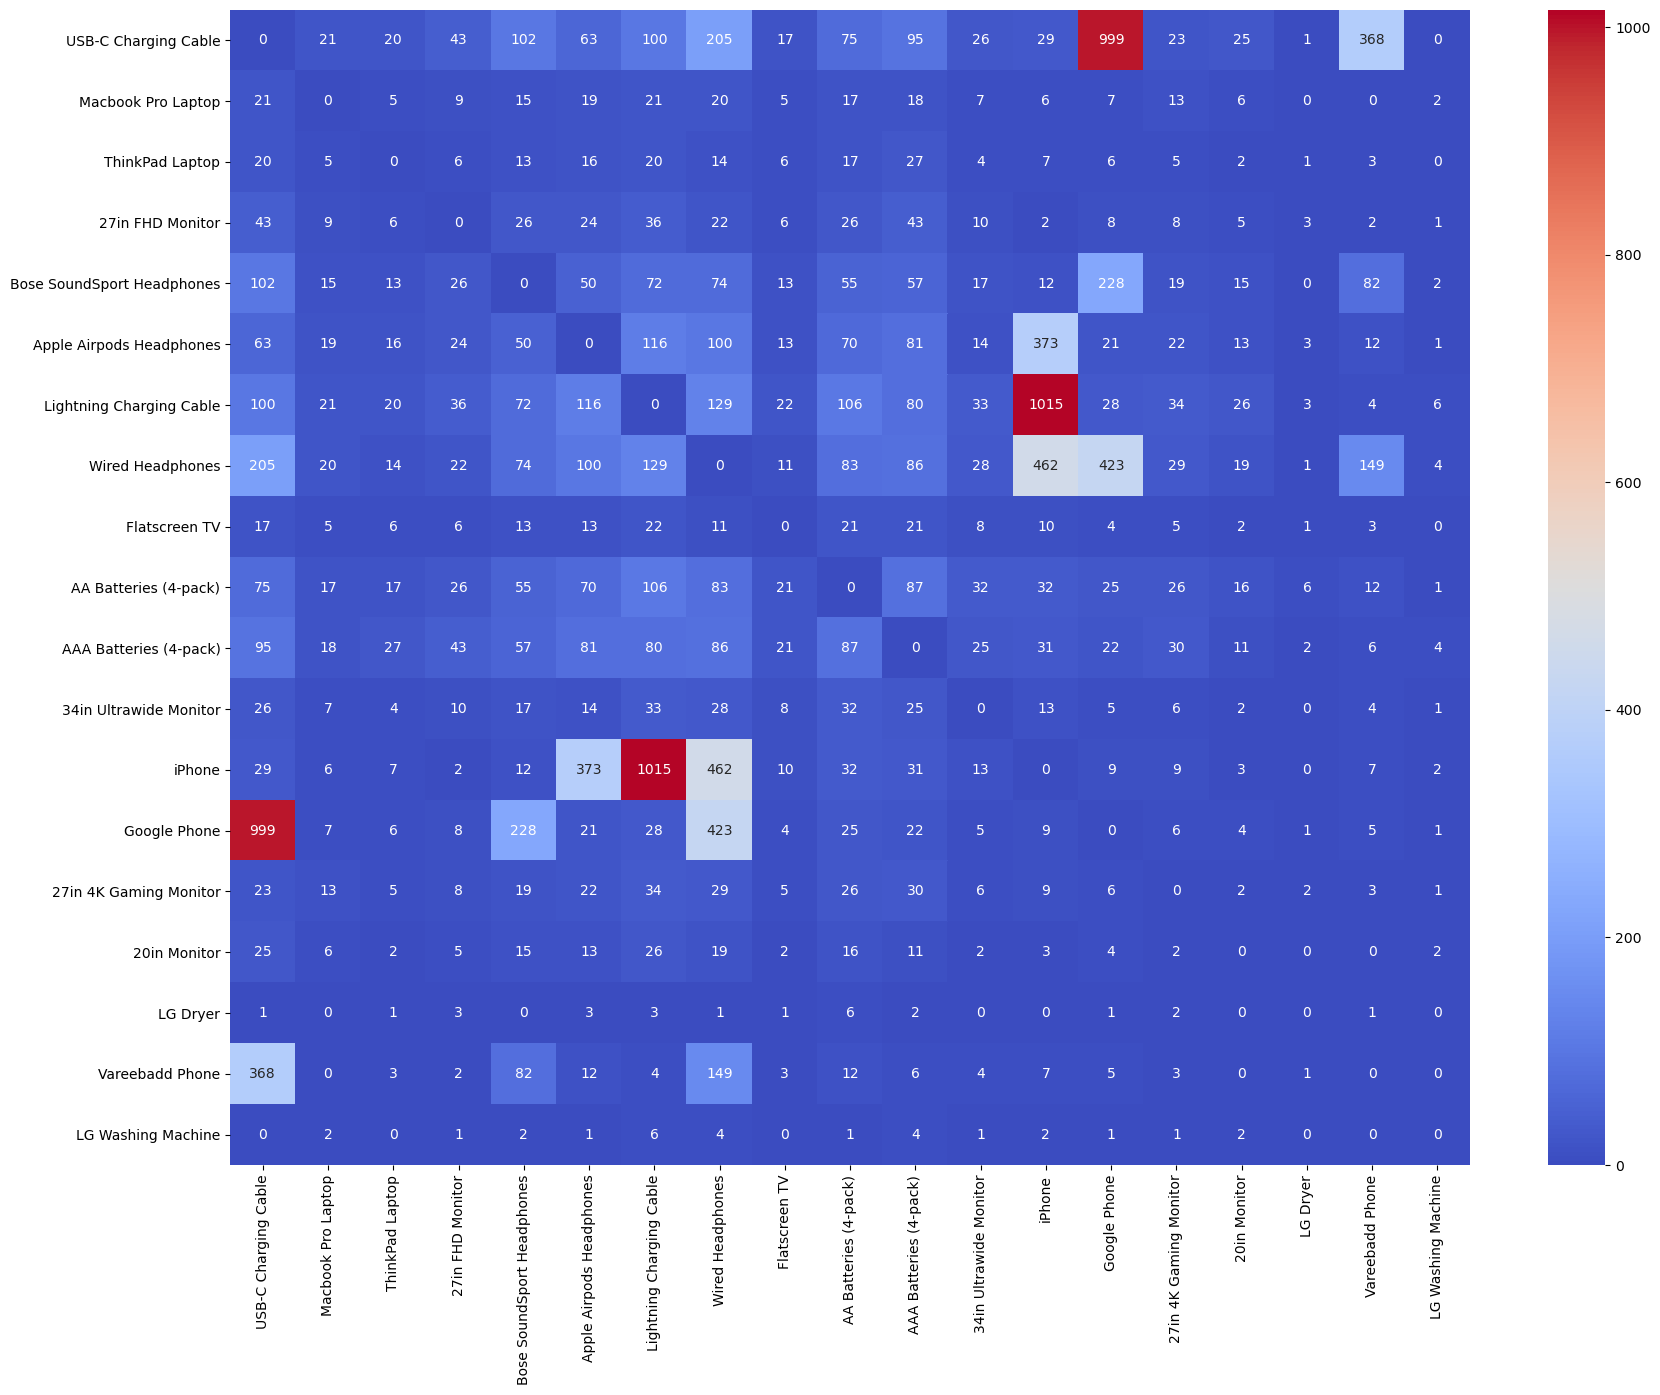

In [0]:
plt.subplots(figsize=(20,15))
sns.heatmap(d, annot = True, cmap= 'coolwarm', fmt='d')

In [0]:
from itertools import combinations
from collections import Counter


count = Counter()

for row in product_list_df['Product']:
    count.update(Counter(combinations(row, 2)))

for key, value in count.most_common(10):
    print (key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## What product sold the most?

Price is correlated with the quantity was sold.

1. AA Batteries (4-pack)       -      3.84   - 27635 items
        
2. AAA Batteries (4-pack)      -      2.99 - 31017 items



**Correlation is about ~ -0.6. So we can say that there is correlation** 

In [0]:
product_amount = df.groupby('Product').sum()['Quantity Ordered'].sort_index()
product_amount

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

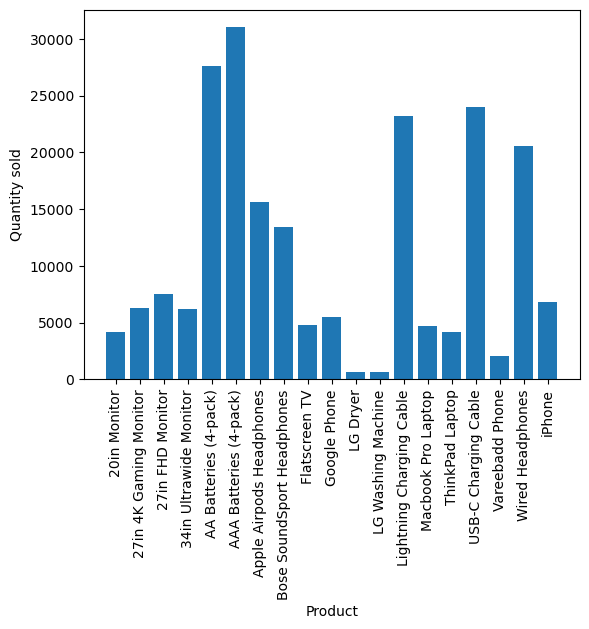

In [0]:
products = product_amount.index.to_list()
plt.xticks(rotation = 'vertical')
plt.bar(products, product_amount)
plt.xlabel("Product")
plt.ylabel("Quantity sold")
plt.show()

In [0]:
prices = df.groupby("Product")['Price Each'].mean().sort_index()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

/opt/datalore/python/datalore/core/evaluation_engine/evaluation_process.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  registry.register_serialization()


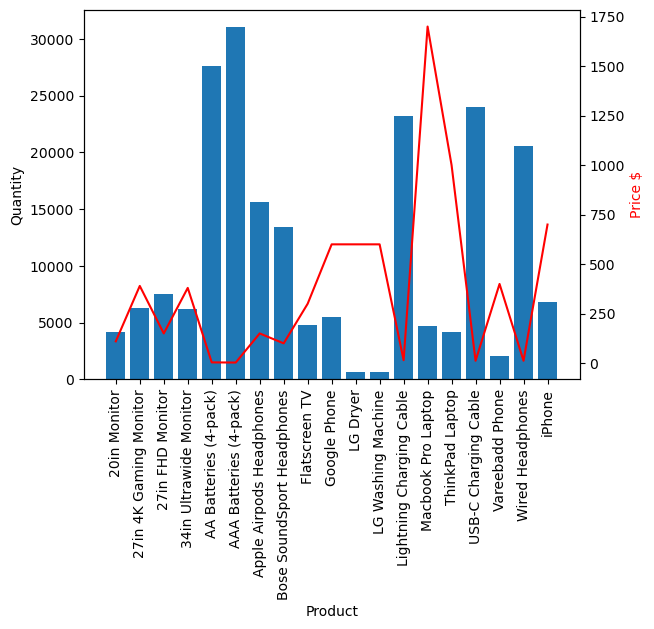

In [0]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, product_amount )
ax2.plot(products, prices, 'r-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity')

ax2.set_ylabel('Price $', color = 'r')

ax1.set_xticklabels(products, rotation = 'vertical')

plt.show()

In [0]:
prices.to_frame()['Price Each'].corr(product_amount.to_frame()['Quantity Ordered'])

-0.601443055993453